In [13]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
cubic = ["Al","Cu","K","Pd","V","W"]
cubic_2 = ["Al","Cu","K","Pd","W"]
bcc = ["K","V","W"]
fcc = ["Al","Cu","Pd"]
hexagonal = ["Ti","Y","Re"]
all_elements = cubic+hexagonal
all_elements_2 = cubic_2+hexagonal

In [3]:
def get_mean_data(method,elements,sub_method=None):
    for el in elements:
        if el in ["Ti","Y","Re"]:
            sizes = range(1,8)
        else:
            sizes = range(1,12)
            
        for i in sizes:
            data = []
            kpd = []
            if sub_method is None:
                f = open("../data/{0}_{1}/{2}_atom_convergence.csv".format(el,method,i),"r")
            else:
                f = open("../data/{0}_{1}/{2}_{3}_atom_convergence.csv".format(el,method,i,sub_method),"r")
            reader = csv.reader(f,delimiter='\t')
            for row in reader:
                if int(row[0]) in kpd:
                    loc = kpd.index(int(row[0]))
                    data[loc][1] = (data[loc][1]+float(row[1]))/2.
                else:
                    kpd.append(int(row[0]))
                    point = [int(row[0]),float(row[1])]
                    data.append(point)
                    
            data = np.array(data)
            if len(data) >= 1:
                df = pd.DataFrame(data[:,1:],index=data[:,0])#,columns=[str(i)+' atom'])    
            else:
                print("element",el,"size",i)
                
            if i > 1 or el != elements[0]:
                outdf = pd.concat([outdf,df], axis=1)
            else:
                outdf = df

    outdf['mean'] = outdf.mean(axis=1) 
    outdf['count'] = outdf.apply(lambda x: x.count(), axis=1)
    return outdf

In [6]:
def get_mean_data_full(method,elements,sub_method=None):
    for el in elements:
        if el in ["Ti","Y","Re"]:
            sizes = range(1,8)
        else:
            sizes = range(1,12)
            
        for i in sizes:
            data = []
            kpd = []
            if sub_method is None:
                f = open("../data/{0}_{1}/{2}_atom_full_convergence.csv".format(el,method,i),"r")
            else:
                f = open("../data/{0}_{1}/{2}_{3}_atom_full_convergence.csv".format(el,method,i,sub_method),"r")
            reader = csv.reader(f,delimiter='\t')
            for row in reader:
                if int(row[0]) in kpd:
                    loc = kpd.index(int(row[0]))
                    data[loc][1] = (data[loc][1]+float(row[1]))/2.
                else:
                    kpd.append(int(row[0]))
                    point = [int(row[0]),float(row[1])]
                    data.append(point)
                    
            data = np.array(data)
            if len(data) >= 1:
                df = pd.DataFrame(data[:,1:],index=data[:,0])#,columns=[str(i)+' atom'])    
            else:
                print("element",el,"size",i)
                
            if i > 1 or el != elements[0]:
                outdf = pd.concat([outdf,df], axis=1)
            else:
                outdf = df

    outdf['mean'] = outdf.mean(axis=1) 
    outdf['count'] = outdf.apply(lambda x: x.count(), axis=1)
    return outdf

In [4]:
Mueller = get_mean_data("Mueller",all_elements)
Aflow = get_mean_data("AFLOW",all_elements)
Froyen_hcp = get_mean_data("Froyen",hexagonal,sub_method="hcp")
Mueller_hcp = get_mean_data("Mueller",hexagonal)
Froyen_sc = get_mean_data("Froyen",cubic,sub_method="sc")
Froyen_bcc = get_mean_data("Froyen",cubic,sub_method="bcc")
Froyen_fcc = get_mean_data("Froyen",cubic,sub_method="fcc")
Mueller_cubic = get_mean_data("Mueller",cubic)
Hess = get_mean_data("Hess",all_elements)
Hess_bcc = get_mean_data("Hess",bcc)
Hess_fcc = get_mean_data("Hess",fcc)
Hess_hcp = get_mean_data("Hess",hexagonal)
Mueller_bcc = get_mean_data("Mueller",bcc)
Mueller_fcc = get_mean_data("Mueller",fcc)

('element', 'Cu', 'size', 9)
('element', 'V', 'size', 11)
('element', 'Cu', 'size', 9)
('element', 'Cu', 'size', 11)
('element', 'K', 'size', 11)
('element', 'V', 'size', 5)
('element', 'V', 'size', 9)


In [7]:
Mueller_full = get_mean_data_full("Mueller",all_elements)
Mueller_full_2 = get_mean_data_full("Mueller",all_elements_2)
Aflow_full = get_mean_data_full("AFLOW",all_elements)
Aflow_full_2 = get_mean_data_full("AFLOW",all_elements_2)
Froyen_hcp_full = get_mean_data_full("Froyen",hexagonal,sub_method="hcp")
Mueller_hcp_full = get_mean_data_full("Mueller",hexagonal)
Froyen_sc_full = get_mean_data_full("Froyen",cubic,sub_method="sc")
Froyen_bcc_full = get_mean_data_full("Froyen",cubic,sub_method="bcc")
Froyen_fcc_full = get_mean_data_full("Froyen",cubic,sub_method="fcc")
Mueller_cubic_full = get_mean_data_full("Mueller",cubic)
Hess_full = get_mean_data_full("Hess",all_elements)
Froyen_sc_full_2 = get_mean_data_full("Froyen",cubic_2,sub_method="sc")
Froyen_bcc_full_2 = get_mean_data_full("Froyen",cubic_2,sub_method="bcc")
Froyen_fcc_full_2 = get_mean_data_full("Froyen",cubic_2,sub_method="fcc")
Mueller_cubic_full_2 = get_mean_data_full("Mueller",cubic_2)
Hess_full_2 = get_mean_data_full("Hess",all_elements_2)

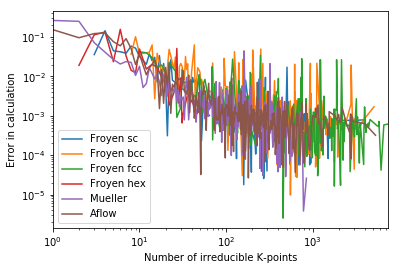

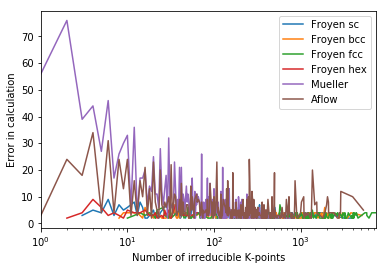

In [168]:
fig, ax = plt.subplots(1,1)
#Froyen_sc_full_2.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen sc")
#Froyen_bcc_full_2.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen bcc")
#Froyen_fcc_full_2.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen fcc")
#Froyen_hcp_full.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen hex")
#Mueller_full_2.reset_index().plot(x="index",y="mean",ax=ax,label="Mueller")
#Aflow_full_2.reset_index().plot(x="index",y="mean",ax=ax,label="Aflow")
Froyen_sc_full.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen sc")
Froyen_bcc_full.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen bcc")
Froyen_fcc_full.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen fcc")
Froyen_hcp_full.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen hex")
Mueller_full.reset_index().plot(x="index",y="mean",ax=ax,label="Mueller")
Aflow_full.reset_index().plot(x="index",y="mean",ax=ax,label="Aflow")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Number of irreducible K-points")
plt.ylabel("Error in calculation")
#ax.set_ylim([1E-6,1])
plt.savefig("all.pdf")
plt.show()
fig, ax = plt.subplots(1,1)
#Froyen_sc_full_2.reset_index().plot(x="index",y="count",ax=ax,label="Froyen sc")
#Froyen_bcc_full_2.reset_index().plot(x="index",y="count",ax=ax,label="Froyen bcc")
#Froyen_fcc_full_2.reset_index().plot(x="index",y="count",ax=ax,label="Froyen fcc")
#Froyen_hcp_full.reset_index().plot(x="index",y="count",ax=ax,label="Froyen hex")
#Mueller_full_2.reset_index().plot(x="index",y="count",ax=ax,label="Mueller")
#Aflow_full_2.reset_index().plot(x="index",y="count",ax=ax,label="Aflow")
Froyen_sc_full.reset_index().plot(x="index",y="count",ax=ax,label="Froyen sc")
Froyen_bcc_full.reset_index().plot(x="index",y="count",ax=ax,label="Froyen bcc")
Froyen_fcc_full.reset_index().plot(x="index",y="count",ax=ax,label="Froyen fcc")
Froyen_hcp_full.reset_index().plot(x="index",y="count",ax=ax,label="Froyen hex")
Mueller_full.reset_index().plot(x="index",y="count",ax=ax,label="Mueller")
Aflow_full.reset_index().plot(x="index",y="count",ax=ax,label="Aflow")
#plt.yscale('log')
plt.xscale('log')
plt.xlabel("Number of irreducible K-points")
plt.ylabel("Error in calculation")
#ax.set_ylim([1E-6,1])
plt.show()

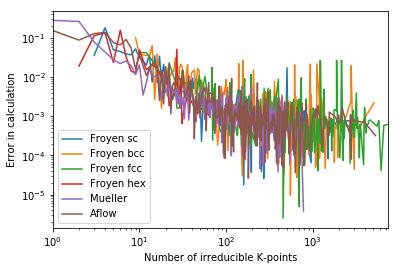

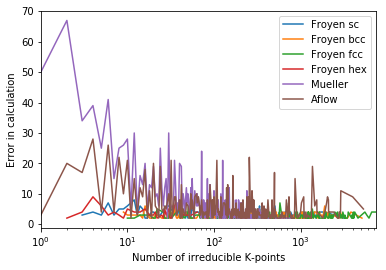

In [169]:
fig, ax = plt.subplots(1,1)
Froyen_sc_full_2.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen sc")
Froyen_bcc_full_2.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen bcc")
Froyen_fcc_full_2.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen fcc")
Froyen_hcp_full.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen hex")
Mueller_full_2.reset_index().plot(x="index",y="mean",ax=ax,label="Mueller")
Aflow_full_2.reset_index().plot(x="index",y="mean",ax=ax,label="Aflow")
#Froyen_sc_full.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen sc")
#Froyen_bcc_full.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen bcc")
#Froyen_fcc_full.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen fcc")
#Froyen_hcp_full.reset_index().plot(x="index",y="mean",ax=ax,label="Froyen hex")
#Mueller_full.reset_index().plot(x="index",y="mean",ax=ax,label="Mueller")
#Aflow_full.reset_index().plot(x="index",y="mean",ax=ax,label="Aflow")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Number of irreducible K-points")
plt.ylabel("Error in calculation")
#ax.set_ylim([1E-6,1])
plt.savefig("no_V.pdf")
plt.show()
fig, ax = plt.subplots(1,1)
Froyen_sc_full_2.reset_index().plot(x="index",y="count",ax=ax,label="Froyen sc")
Froyen_bcc_full_2.reset_index().plot(x="index",y="count",ax=ax,label="Froyen bcc")
Froyen_fcc_full_2.reset_index().plot(x="index",y="count",ax=ax,label="Froyen fcc")
Froyen_hcp_full.reset_index().plot(x="index",y="count",ax=ax,label="Froyen hex")
Mueller_full_2.reset_index().plot(x="index",y="count",ax=ax,label="Mueller")
Aflow_full_2.reset_index().plot(x="index",y="count",ax=ax,label="Aflow")
#Froyen_sc_full.reset_index().plot(x="index",y="count",ax=ax,label="Froyen sc")
#Froyen_bcc_full.reset_index().plot(x="index",y="count",ax=ax,label="Froyen bcc")
#Froyen_fcc_full.reset_index().plot(x="index",y="count",ax=ax,label="Froyen fcc")
#Froyen_hcp_full.reset_index().plot(x="index",y="count",ax=ax,label="Froyen hex")
#Mueller_full.reset_index().plot(x="index",y="count",ax=ax,label="Mueller")
#Aflow_full.reset_index().plot(x="index",y="count",ax=ax,label="Aflow")
#plt.yscale('log')
plt.xscale('log')
plt.xlabel("Number of irreducible K-points")
plt.ylabel("Error in calculation")
#ax.set_ylim([1E-6,1])
plt.show()

In [19]:
Froy_sc = np.asarray(Froyen_sc.reset_index().loc[:,["index","mean"]])
Froy_bcc = np.asarray(Froyen_bcc.reset_index().loc[:,["index","mean"]])
Froy_fcc = np.asarray(Froyen_fcc.reset_index().loc[:,["index","mean"]])
Froy_hcp = np.asarray(Froyen_hcp.reset_index().loc[:,["index","mean"]])
Muel_cubic = np.asanyarray(Mueller_cubic.reset_index().loc[:,["index","mean"]])
Muel_hcp = np.asanyarray(Mueller_hcp.reset_index().loc[:,["index","mean"]])
Muel = np.asanyarray(Mueller.reset_index().loc[:,["index","mean"]])
Muel_bcc = np.asanyarray(Mueller_bcc.reset_index().loc[:,["index","mean"]])
Muel_fcc = np.asanyarray(Mueller_fcc.reset_index().loc[:,["index","mean"]])
Afl = np.asanyarray(Aflow.reset_index().loc[:,["index","mean"]])
Hes = np.asanyarray(Hess.reset_index().loc[:,["index","mean"]])
Hes_bcc = np.asanyarray(Hess_bcc.reset_index().loc[:,["index","mean"]])
Hes_fcc = np.asanyarray(Hess_fcc.reset_index().loc[:,["index","mean"]])
Hes_hcp = np.asanyarray(Hess_hcp.reset_index().loc[:,["index","mean"]])

In [91]:
def make_bin_plots_data(data_frame):
    data = np.asanyarray(data_frame.reset_index().loc[:,["index","mean","count"]])
    #hist = np.asanyarray(data_frame.reset_index().loc[:,["index","count"]])
    i=0
    k=1
    new_data = []
    errors = []
    hist = []
    bins = []
    for j in data:
        count = 0
        placed = False
        while not placed and count < 5:
            count += 1
            #print("j",j,"i",i,"k",k,j[0]/10**(i))
            if j[0]/10**(i) >=k and j[0]/10**(i) <k+1:
                errors.append(j[1])
                for z in range(int(j[2])):
                    hist.append(j[0])
                if k*10**i not in bins:
                    bins.append(k*10**i)
                placed = True
            elif j[0]/10**(i) >= k+1 and j[0]/10**(i) < 10:
                new_data.append([k*10**i,np.mean(errors)])
                k += 1
                errors = []
            elif j[0]/10**(i) >= 10:
                if len(errors) >=1:
                    new_data.append([k*10**i,np.mean(errors)])
                    k=1
                i += 1
                
    return np.array(new_data), hist, bins

In [111]:
Muel_plot, Muel_hist, Muel_bins =make_bin_plots_data(Mueller_full)
Froy_sc_plot, Froy_sc_hist, Froy_sc_bins =make_bin_plots_data(Froyen_sc_full)
Froy_bcc_plot, Froy_bcc_hist, Froy_bcc_bins =make_bin_plots_data(Froyen_bcc_full)
Froy_fcc_plot, Froy_fcc_hist, Froy_fcc_bins =make_bin_plots_data(Froyen_fcc_full)
Froy_hcp_plot, Froy_hcp_hist, Froy_hcp_bins =make_bin_plots_data(Froyen_hcp_full)
Afl_plot, Afl_hist, Afl_bins = make_bin_plots_data(Aflow_full)

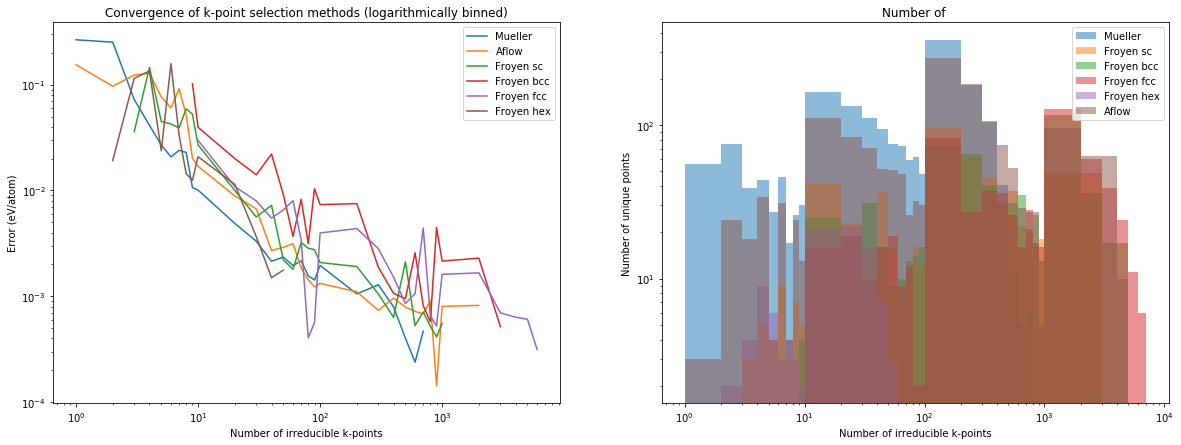

In [112]:
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.plot(Muel_plot[:,0],Muel_plot[:,1],label="Mueller")
plt.plot(Afl_plot[:,0],Afl_plot[:,1],label="Aflow")
plt.plot(Froy_sc_plot[:,0],Froy_sc_plot[:,1],label="Froyen sc")
plt.plot(Froy_bcc_plot[:,0],Froy_bcc_plot[:,1],label="Froyen bcc")
plt.plot(Froy_fcc_plot[:,0],Froy_fcc_plot[:,1],label="Froyen fcc")
plt.plot(Froy_hcp_plot[:,0],Froy_hcp_plot[:,1],label="Froyen hex")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.legend(loc="upper right")
plt.title("Convergence of k-point selection methods (logarithmically binned)")
plt.subplot(122)
plt.hist(Muel_hist, Muel_bins,label="Mueller",alpha=0.5)
plt.hist(Froy_sc_hist, Froy_sc_bins,label="Froyen sc",alpha=0.5)
plt.hist(Froy_bcc_hist, Froy_bcc_bins,label="Froyen bcc",alpha=0.5)
plt.hist(Froy_fcc_hist, Froy_fcc_bins,label="Froyen fcc",alpha=0.5)
plt.hist(Froy_hcp_hist, Froy_hcp_bins,label="Froyen hex",alpha=0.5)
plt.hist(Afl_hist, Afl_bins,label="Aflow",alpha=0.5)
plt.ylabel("Number of unique points")
plt.xlabel("Number of irreducible k-points")
plt.legend(loc="upper right")
plt.title("Number of occurances")
plt.yscale('log')
plt.xscale('log')
plt.show()

In [10]:
def make_scatter_plot_data(data_frame):
    rows = np.asarray(data_frame.index)
    
    data = []
    for row in rows:
        temp = data_frame.ix[:,data_frame.columns.difference(["mean","count"])].loc[row].dropna().values
        for t in temp:
            data.append([int(row),t])
            
    return np.array(data)
        

In [11]:
Muel_scat = make_scatter_plot_data(Mueller_full)
Froy_sc_scat = make_scatter_plot_data(Froyen_sc_full)
Froy_bcc_scat = make_scatter_plot_data(Froyen_bcc_full)
Froy_fcc_scat = make_scatter_plot_data(Froyen_fcc_full)
Froy_hcp_scat = make_scatter_plot_data(Froyen_hcp_full)
Afl_scat = make_scatter_plot_data(Aflow_full)

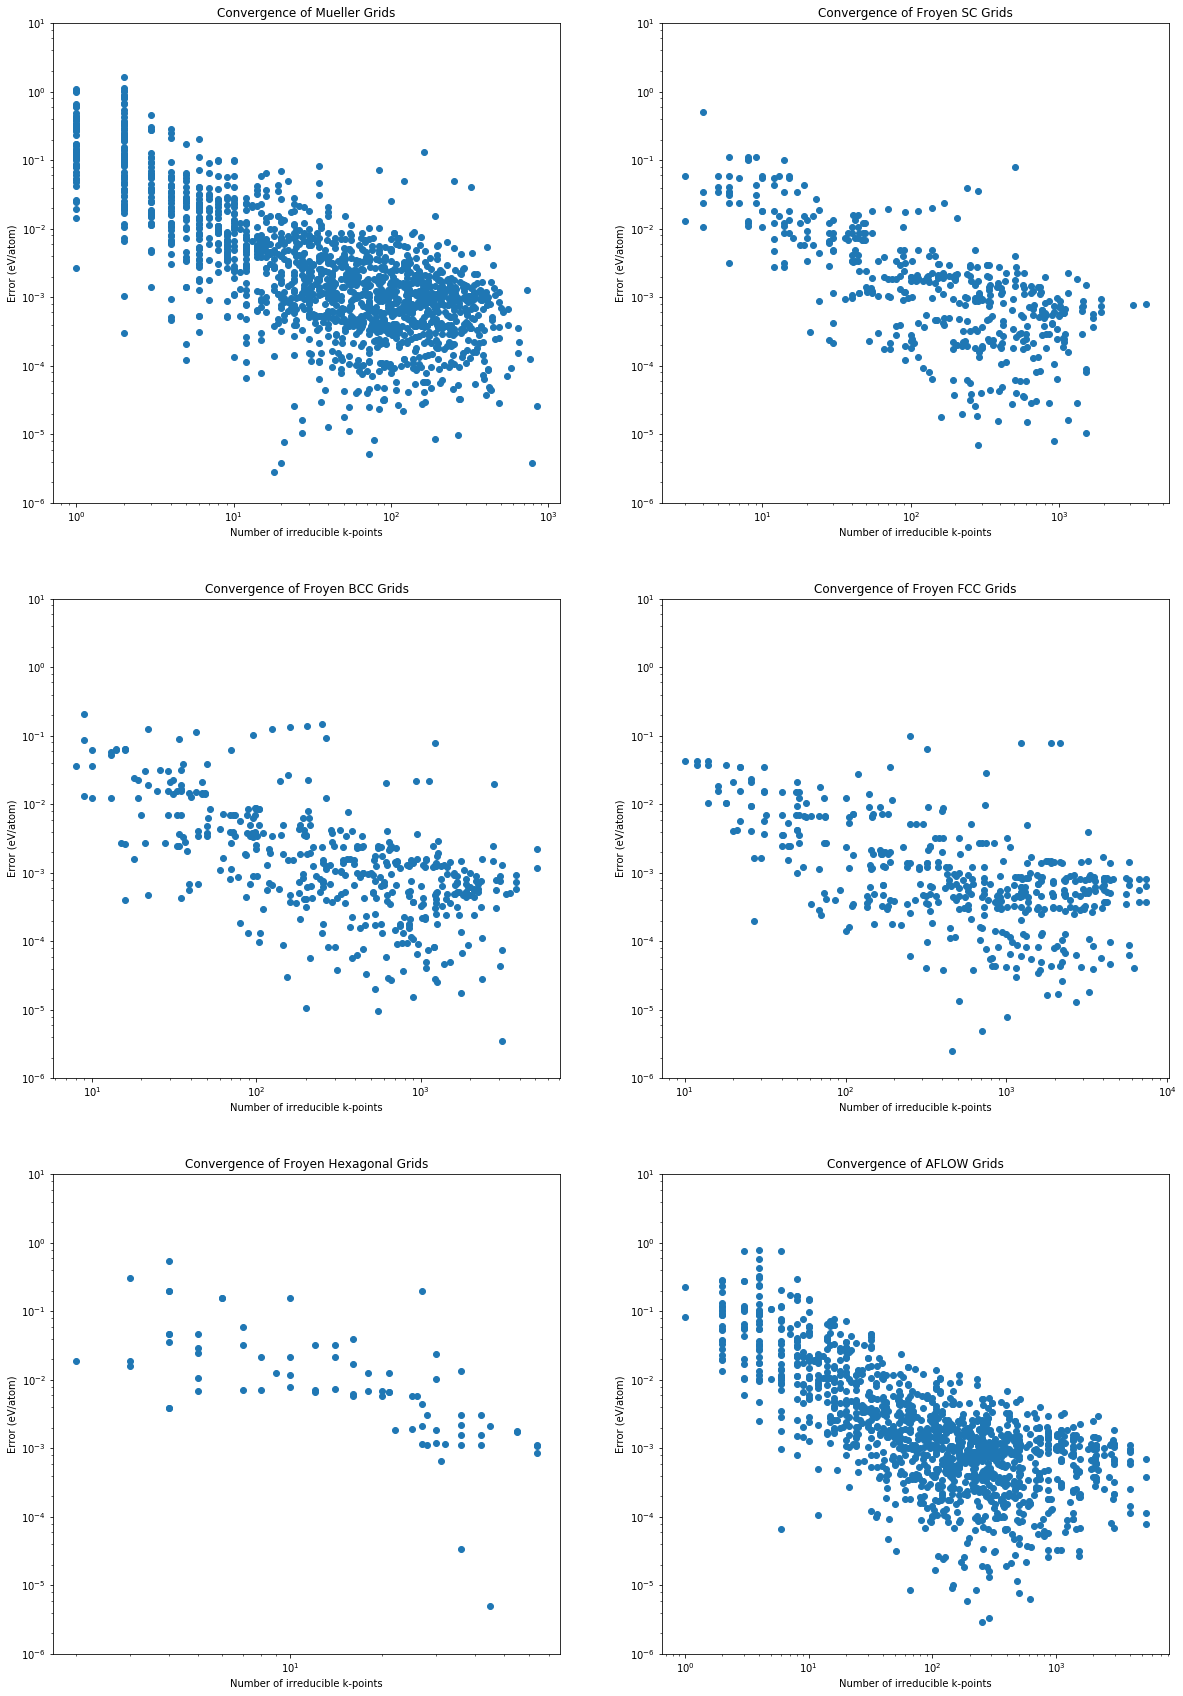

In [157]:
plt.figure(figsize=(20,30))
plt.subplot(321)
plt.scatter(Muel_scat[:,0],Muel_scat[:,1],label="Mueller")
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Mueller Grids")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-6,10)
plt.subplot(322)
plt.scatter(Froy_sc_scat[:,0],Froy_sc_scat[:,1],label="Frofen sc")
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Froyen SC Grids")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-6,10)
plt.subplot(323)
plt.scatter(Froy_bcc_scat[:,0],Froy_bcc_scat[:,1],label="Frofen bcc")
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Froyen BCC Grids")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-6,10)
plt.subplot(324)
plt.scatter(Froy_fcc_scat[:,0],Froy_fcc_scat[:,1],label="Frofen fcc")
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Froyen FCC Grids")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-6,10)
plt.subplot(325)
plt.scatter(Froy_hcp_scat[:,0],Froy_hcp_scat[:,1],label="Froyen hex")
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Froyen Hexagonal Grids")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-6,10)
plt.subplot(326)
plt.scatter(Afl_scat[:,0],Afl_scat[:,1],label="Aflow")
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of AFLOW Grids")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-6,10)
plt.show()
#Muel_scat

In [10]:
Froy_sc_full = np.asarray(Froyen_sc_full.reset_index().loc[:,["index","mean"]])
Froy_bcc_full = np.asarray(Froyen_bcc_full.reset_index().loc[:,["index","mean"]])
Froy_fcc_full = np.asarray(Froyen_fcc_full.reset_index().loc[:,["index","mean"]])
Froy_hcp_full = np.asarray(Froyen_hcp_full.reset_index().loc[:,["index","mean"]])
Muel_cubic_full = np.asanyarray(Mueller_cubic_full.reset_index().loc[:,["index","mean"]])
Muel_hcp_full = np.asanyarray(Mueller_hcp_full.reset_index().loc[:,["index","mean"]])
Muel_full = np.asanyarray(Mueller_full.reset_index().loc[:,["index","mean"]])
Afl_full = np.asanyarray(Aflow_full.reset_index().loc[:,["index","mean"]])
Hes_full = np.asanyarray(Hess_full.reset_index().loc[:,["index","mean"]])

In [13]:
Muel_full_srt = sort_energies(Muel_full)
Afl_full_srt = sort_energies(Afl_full)
Hes_full_srt = sort_energies(Hes_full)

In [14]:
def bin_2D_array(array,bin_size):
    binned = []
    for i in range(0,int(max(array[:,0]))+bin_size,bin_size):
        temp = 0
        count = 0
        for k in range(len(array)):
            if array[k][0] < (i+bin_size) and array[k][0] >= i:
                temp += array[k][1]
                count += 1
        if count > 0:
            binned.append([i,temp/float(count)])
    return np.array(binned)

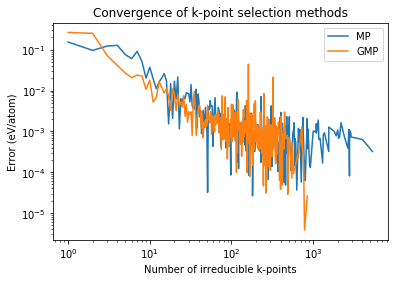

In [32]:
bin_size=1
a_bin = bin_2D_array(Afl_full_srt,bin_size)
h_bin = bin_2D_array(Hes_full_srt,bin_size)
m_bin = bin_2D_array(Muel_full_srt,bin_size)
plt.plot(a_bin[:,0],a_bin[:,1],label="MP")
plt.plot(m_bin[:,0],m_bin[:,1],label="GMP")
#plt.plot(h_bin[:,0],h_bin[:,1],label="Relaxed")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.legend(loc="upper right")
plt.title("Convergence of k-point selection methods")
#plt.ylim(1E-4,1E-2)
plt.show()
#plt.savefig("../plots/Jeremy1.pdf")

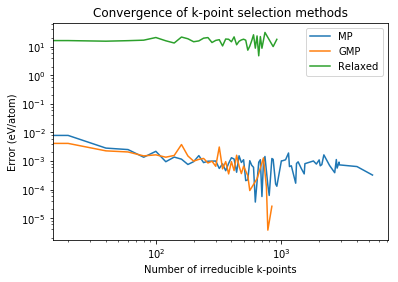

In [30]:
bin_size=20
a_bin = bin_2D_array(Afl_full,bin_size)
h_bin = bin_2D_array(Hes_full,bin_size)
m_bin = bin_2D_array(Muel_full,bin_size)
plt.plot(a_bin[:,0],a_bin[:,1],label="MP")
plt.plot(m_bin[:,0],m_bin[:,1],label="GMP")
plt.plot(h_bin[:,0],h_bin[:,1],label="Relaxed")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.legend(loc="upper right")
plt.title("Convergence of k-point selection methods")
plt.savefig("../plots/Jeremy2.pdf")
plt.show()

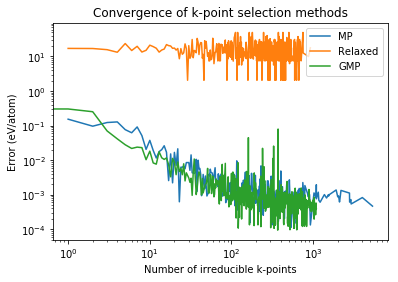

In [17]:
plt.plot(Afl[:,0],Afl[:,1],label="MP")
plt.plot(Hes[:,0],Hes[:,1],label="Relaxed")
plt.plot(Muel[:,0],Muel[:,1],label="GMP")
#plt.xlim(0.0005,.004)
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.legend(loc="upper right")
plt.title("Convergence of k-point selection methods")
plt.show()
#plt.savefig("../plots/Jeremy2.pdf")

In [11]:
def sort_energies(data):
    data = data[np.argsort(data[:,1])]
    for i in range(len(data)):
        if data[i][1] == data[i-1][1]:
            temp = deepcopy(data[i])
            data[i] = deepcopy(data[i-1])
            data[i-1] = temp
    for i in range(len(data)):
        if data[i][1] == data[i-1][1]:
            temp = deepcopy(data[i])
            data[i] = deepcopy(data[i-1])
            data[i-1] = temp

    return data

In [12]:
Muel = sort_energies(Muel)
Afl = sort_energies(Afl)
Froy_hcp = sort_energies(Froy_hcp)
Froy_sc = sort_energies(Froy_sc)
Froy_bcc = sort_energies(Froy_bcc)
Froy_fcc = sort_energies(Froy_fcc)
Muel_cubic = sort_energies(Muel_cubic)
Muel_hcp = sort_energies(Muel_hcp)
Hes = sort_energies(Hes)
Hes_bcc = sort_energies(Hes_bcc)
Hes_fcc = sort_energies(Hes_fcc)
Hes_hcp = sort_energies(Hes_hcp)
Muel_bcc = sort_energies(Muel_bcc)
Muel_fcc = sort_energies(Muel_fcc)

In [13]:
import math
def half_magnitude(x):
    """Finds the magnitude of the value and returns 5*10^(magnitude)."""
    return .1*10**int(math.log10(x))

In [14]:
def radial_dist(center,point):
    #if np.allclose(center[0],0):
    #    print("H1")
    #if np.allclose(center[1],0):
    #    print("H2")
    #if np.allclose(point[0],0):
    #    print("H3",point)
    #if np.allclose(point[1],0):
    #    print("H4")
    #xd = np.log10(center[0])-np.log10(point[0])
    #if np.allclose(point[0], 0) and not np.allclose(center[0],0):
    #    xd = np.log10(center[0])
    #elif np.allclose(center[0],0) and not np.allclose(point[0],0):
    #    xd = np.log10(point[0])
    #elif np.allclose(center[0],0) and np.allclose(point[0],0):
    #    xd = 1E-10
    #else:
    xd = abs(np.log10(center[0]))-abs(np.log10(point[0]))

    if np.allclose(point[1], 0) and not np.allclose(center[1],0):
        yd = np.log10(center[1])
    elif np.allclose(center[1],0) and not np.allclose(point[1],0):
        yd = np.log10(point[1])
    elif np.allclose(center[1],0) and np.allclose(point[1],0):
        yd = 1E-10
    else:
        yd = abs(np.log10(center[1]))-abs(np.log10(point[1]))
        
    yd = np.log10(center[1])-np.log10(point[1])
    r = np.sqrt(xd*xd+yd*yd)
    return r

In [21]:
def get_ratios(top,bottom):
    kpd= []
    err = []
    for pf in top:
        #hm = half_magnitude(pf[1])
        #hm2 = half_magnitude(pf[0])
        tr = pf[0]
        br = None
        ber = None
        dist = None
        if not pf[1] in err:
            for pm in bottom:
                #test = abs(pm[1]-pf[1])
                test = radial_dist(pf,pm)
                #test2 = abs(pm[0]-pf[1])
                if dist is None:
                    dist = test
                    br = pm[0] 
                    ber = pm[1]
                elif test < dist and abs(ber)<abs(pm[1]):
                    dist = test
                    br = pm[0]
                    ber = pm[1]
                #if test < hm:
                #    trial_set1 = [float(pf[0]),float(pm[0])]
                #    if br is not None:
                #        trial_set2 = [float(br),float(pf[0])]
                #    if br is None and ber is None:
                #        br = pm[0]
                #        ber = pm[1]
                #    elif ber < pf[1] and abs(ber-pf[1]) > test:
#                    elif abs(ber-pf[1]) > test and abs(pf[0]-pm[0])<abs(br-pf[0]):
                        #print("h")
                #        br = pm[0]
                #        ber = pm[1]
            if ber is not None and br is not None:
                err.append(pf[1])#((pf[1]+ber)/2.)
                kpd.append(float(tr)/float(br))
    return kpd, err

In [22]:
kpd_afl, err_afl = get_ratios(Afl,Muel)
#kpd_hes, err_hes = get_ratios(Hes,Muel)
kpd_hcp, err_hcp = get_ratios(Froy_hcp,Muel_hcp)
kpd_sc, err_sc = get_ratios(Froy_sc,Muel_cubic)
kpd_bcc, err_bcc = get_ratios(Froy_bcc,Muel_cubic)
kpd_fcc, err_fcc = get_ratios(Froy_fcc,Muel_cubic)
#kpd_hes_bcc, err_hes_bcc = get_ratios(Hes_bcc,Muel_bcc)
#kpd_hes_fcc, err_hes_fcc = get_ratios(Hes_fcc,Muel_fcc)
#kpd_hes_hcp, err_hes_hcp = get_ratios(Hes_hcp,Muel_hcp)

In [23]:
def binned_array(kpd_all,n):
    binned_kpd_all = []
    n_kpd = len(kpd_all)
    for i in range(n_kpd):
        temp = []
        for j in range(-n,n+1):
            if i+j >0 and i+j <n_kpd-1:
                temp.append(kpd_all[i+j])
        binned_kpd_all.append(np.mean(temp))
    return binned_kpd_all

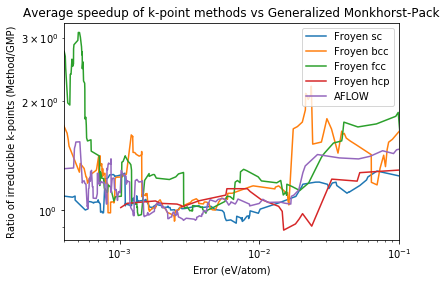

In [25]:
avg_bin = 5
plt.plot(err_sc,binned_array(kpd_sc,avg_bin),label="Froyen sc")
plt.plot(err_bcc,binned_array(kpd_bcc,avg_bin),label="Froyen bcc")
plt.plot(err_fcc,binned_array(kpd_fcc,avg_bin),label="Froyen fcc")
plt.plot(err_hcp,binned_array(kpd_hcp,2),label="Froyen hcp")
plt.plot(err_afl,binned_array(kpd_afl,avg_bin),label="AFLOW")
#plt.plot(err_hes,binned_array(kpd_hes,avg_bin),label="Relaxed")
#plt.plot(err_hes_bcc,binned_array(kpd_hes_bcc,avg_bin),label="Hess bcc")
#plt.plot(err_hes_fcc,binned_array(kpd_hes_fcc,avg_bin),label="Hess fcc")
#plt.plot(err_hes_hcp,binned_array(kpd_hes_hcp,avg_bin),label="Hess hcp")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Error (eV/atom)")
plt.ylabel("Ratio of irreducible k-points (Method/GMP)")
plt.legend(loc="upper right")
plt.title("Average speedup of k-point methods vs Generalized Monkhorst-Pack")
plt.xlim([.4E-3,1E-1])
#plt.ylim([0,10])
plt.savefig("../plots/Y_res.pdf")
plt.show()

In [28]:
print(np.mean(kpd_afl))
#print(np.mean(kpd_hes))
print(np.mean(kpd_bcc))
print(np.mean(kpd_fcc))
print(np.mean(kpd_hcp))
print(np.mean(kpd_sc))
means = [np.mean(kpd_afl),np.mean(kpd_bcc),np.mean(kpd_fcc),
         np.mean(kpd_hcp),np.mean(kpd_sc)]#,np.mean(kpd_hes)]
print("average overall: ",np.mean(means))

1.1168729877
1.29905388378
1.55933724426
1.10185687256
1.06492345858
('average overall: ', 1.2284088893762406)


In [17]:
plt.scatter(Muel_scat[:,0],Muel_scat[:,1],marker='o',s=2)
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Mueller Grids")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-6,10)
plt.savefig("../plots/Just_GMP.pdf")
#plt.show()